# Import library 

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from tensorflow.keras import Sequential  # Corrected import for Sequential

%matplotlib inline



# dataset import

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Explor data analysis 

In [49]:
x_train.shape
x_test.shape

(10000, 28, 28)

In [26]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [44]:
y_train[2]

4

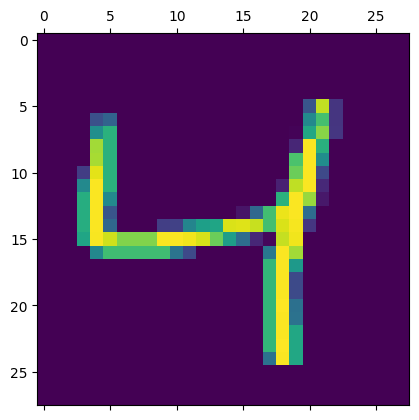

In [45]:
plt.matshow(x_train[2])

In [55]:
x_train_flatten = x_train.reshape(len(x_train),28*28) 
x_test_flatten = x_test.reshape(len(x_test),28*28)
x_train_flatten =x_train_flatten/255
x_test_flatten=x_test_flatten/255

# Model bulid

In [57]:
# Define the model
model = Sequential([
    layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Fit the model (ensure x_train_flatten is the reshaped data and y_train is the label)
model.fit(x_train_flatten, y_train, epochs=5)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8225 - loss: 0.7067
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9112 - loss: 0.3159
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9218 - loss: 0.2788
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9248 - loss: 0.2707
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9270 - loss: 0.2653


# Pradicaion

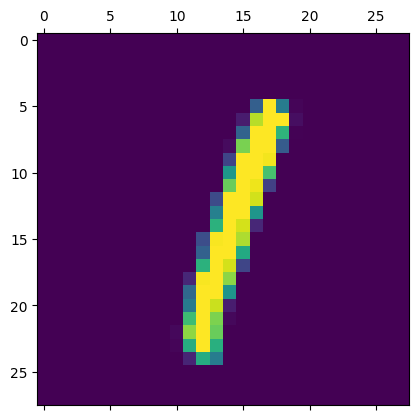

In [65]:
plt.matshow(x_test[5])

In [59]:
y_pred = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [67]:
np.argmax(y_pred[5])
y_pred_label =[np.argmax(i) for i in y_pred]

# Model Evaluation

In [69]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,   10,  917,   21,    8,    3,   12,    9,   40,    5],
       [   2,    0,   15,  934,    1,   18,    3,    8,   20,    9],
       [   1,    2,    3,    1,  915,    0,   12,    4,    7,   37],
       [  10,    3,    2,   42,   11,  759,   19,    7,   32,    7],
       [   9,    3,    3,    2,    7,    9,  920,    2,    3,    0],
       [   1,    7,   21,   10,    9,    0,    0,  941,    2,   37],
       [   7,   12,    5,   26,    9,   17,    9,   11,  868,   10],
       [  10,    7,    1,   12,   29,    4,    0,   17,    7,  922]])>

Text(95.72222222222221, 0.5, 'truth')

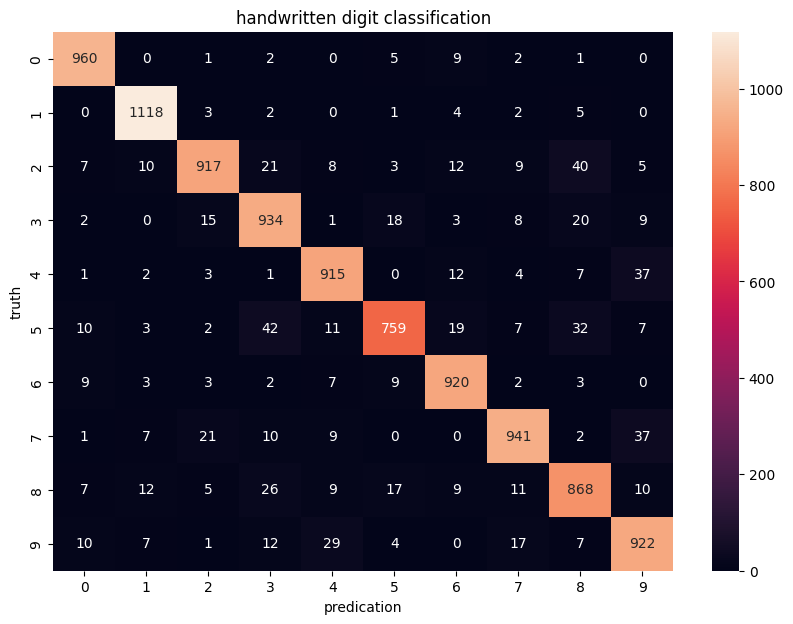

In [71]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.title("handwritten digit classification")
plt.xlabel("predication")
plt.ylabel("truth")